VT5

In [1]:
import pandas as pd
import numpy as np
import glob
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('default')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
laliga_df2016_2017 = pd.read_excel("..\\data\\laligadata\\LaLiga16 17.xlsx").dropna(how='all')
laliga_df2017_2018 = pd.read_excel("..\\data\\laligadata\\LaLiga17 18.xlsx").dropna(how='all')
laliga_df2018_2019 = pd.read_excel("..\\data\\laligadata\\LaLiga18 19.xlsx").dropna(how='all')
laliga_df2019_2020 = pd.read_excel("..\\data\\laligadata\\LaLiga19 20.xlsx").dropna(how='all')
laliga_df2020_2021 = pd.read_excel("..\\data\\laligadata\\LaLiga20 21.xlsx").dropna(how='all')
laliga_df2021_2022 = pd.read_excel("..\\data\\laligadata\\LaLiga21 22.xlsx").dropna(how='all')

In [3]:
laliga = pd.concat([laliga_df2016_2017, laliga_df2017_2018, laliga_df2018_2019, laliga_df2019_2020, laliga_df2020_2021, laliga_df2021_2022], ignore_index=True)

In [4]:
laliga = laliga.loc[:,["Wk",'Date',"Local","Score",'Visitante','Attendance']]

In [5]:
laliga['Attendance'] = laliga['Attendance']*1000
laliga['Torneo'] = 'Primera division'

In [6]:
laliga.head(2)

,Wk,Date,Local,Score,Visitante,Attendance,Torneo
0,1.0,2016-08-19,Málaga,1–1,Osasuna,22347.0,Primera division
1,1.0,2016-08-19,La Coruña,2–1,Eibar,21441.0,Primera division


In [7]:
def golesvisita(marcador):
    goles=marcador.split("–")
    return int(goles[1])
def goleslocal(marcador):
    goles=marcador.split("–")
    return int(goles[0])

laliga['Goles Local'] = laliga['Score'].apply(goleslocal)
laliga['Goles Visitante'] = laliga['Score'].apply(golesvisita)
laliga['Total goles partido'] = laliga['Goles Local'] + laliga['Goles Visitante']

In [8]:
def torneo(año,mes):
    if ((año==2016) & (mes<=12)|(año==2017) & (mes<8)):
        return '16/17'
    elif ((año==2017) & (mes<=12)|(año==2018) & (mes<8)):
        return '17/18'
    elif ((año==2018) & (mes<=12)|(año==2019) & (mes<8)):
        return '18/19'
    elif ((año==2019) & (mes<=12)|(año==2020) & (mes<9)):
        return '19/20'
    elif ((año==2020) & (mes<=12)|(año==2021) & (mes<8)):
        return '20/21'
    elif ((año==2021) & (mes<=12)|(año==2022) & (mes<8)):
        return '21/22'

    
laliga['Año'] = laliga['Date'].dt.year
laliga['Mes'] = laliga['Date'].dt.month
laliga['Temporada'] = laliga.apply(lambda x: torneo(x['Año'],x['Mes']),axis = 1)

In [9]:
def resultado(string):
    goles = string.split('–')
    if int(goles[0])>int(goles[1]):
        return 'Local'
    if int(goles[0])<int(goles[1]):
        return 'Visitante'
    else: 
        return 'Empate'
    
def resultado_equipo(string, local, visita):
    goles = string.split('–')
    if int(goles[0])>int(goles[1]):
        return local
    if int(goles[0])<int(goles[1]):
        return visita
    else: 
        return 'Empate'
    
laliga['Resultado'] = laliga['Score'].apply(resultado)
laliga['Ganador'] = laliga.apply(lambda x: resultado_equipo(x['Score'],x['Local'],x['Visitante']),axis=1)

In [10]:
laliga.head(5)

,Wk,Date,Local,Score,Visitante,Attendance,Torneo,Goles Local,Goles Visitante,Total goles partido,Año,Mes,Temporada,Resultado,Ganador
0,1.0,2016-08-19,Málaga,1–1,Osasuna,22347.0,Primera division,1,1,2,2016,8,16/17,Empate,Empate
1,1.0,2016-08-19,La Coruña,2–1,Eibar,21441.0,Primera division,2,1,3,2016,8,16/17,Local,La Coruña
2,1.0,2016-08-20,Barcelona,6–2,Betis,65731.0,Primera division,6,2,8,2016,8,16/17,Local,Barcelona
3,1.0,2016-08-20,Granada,1–1,Villarreal,15149.0,Primera division,1,1,2,2016,8,16/17,Empate,Empate
4,1.0,2016-08-20,Sevilla,6–4,Espanyol,29420.0,Primera division,6,4,10,2016,8,16/17,Local,Sevilla


Evolucion

In [11]:
ej2122 = laliga[(laliga['Temporada']=='21/22')&(laliga['Torneo']=='Primera division')]
equip2122 = ej2122['Local'].unique().tolist()

In [12]:
def tabla_posicion(data,fecha,equipos):
    tabla = {}
    for equipo in equipos:
        data_usar = data[(data['Wk']<=fecha)&((data['Local']==equipo)|(data['Visitante']==equipo))]
        puntos = 0
        for i in range(len(data_usar)):
            ganador = str(data_usar.iloc[i]['Ganador'])
            if ganador == equipo:
                puntos += 3
            if ganador == 'Empate':
                puntos +=1
        tabla[equipo] = puntos
    df = pd.DataFrame([[key, tabla[key]] for key in tabla.keys()], columns=['Equipo', 'Puntos'])
    df = df.sort_values(by='Puntos',ascending = False).reset_index()
    return df[['Equipo','Puntos']]

In [13]:
tabla_33 = tabla_posicion(ej2122,33,equip2122)
tabla_33

,Equipo,Puntos
0,Real Madrid,78
1,Barcelona,63
2,Sevilla,63
3,Atlético Madrid,61
4,Betis,57
5,Real Sociedad,55
6,Villarreal,52
7,Athletic Club,48
8,Osasuna,44
9,Valencia,42


In [14]:
ej2122 = laliga[(laliga['Temporada']=='21/22')&(laliga['Torneo']=='Primera division')]
equip2122 = ej2122['Local'].unique().tolist()

In [15]:
def tabla_posicion_equipo(data,fecha,equipos,eq):
    tabla = {}
    for equipo in equipos:
        data_usar = data[(data['Wk']<=fecha)&((data['Local']==equipo)|(data['Visitante']==equipo))]
        puntos = 0
        for i in range(len(data_usar)):
            ganador = str(data_usar.iloc[i]['Ganador'])
            if ganador == equipo:
                puntos += 3
            if ganador == 'Empate':
                puntos +=1
        tabla[equipo] = puntos
    df = pd.DataFrame([[key, tabla[key]] for key in tabla.keys()], columns=['Equipo', 'Puntos'])
    df = df.sort_values(by='Puntos',ascending = False).reset_index()
    df = df[['Equipo','Puntos']]
    pos = df[df['Equipo']==eq].index.values[0]
    return pos+1

In [16]:
fechas = sorted(ej2122['Wk'].unique().tolist())

In [17]:
fecha = 38
equipo = "Betis"

In [18]:
posiciones = []
for fec in fechas:
    pos = tabla_posicion_equipo(ej2122,fec,equip2122,equipo)
    posiciones.append(pos)
    if fec == fecha:
        break

In [19]:
posiciones

[15,
 15,
 17,
 11,
 13,
 10,
 7,
 11,
 8,
 5,
 4,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5]

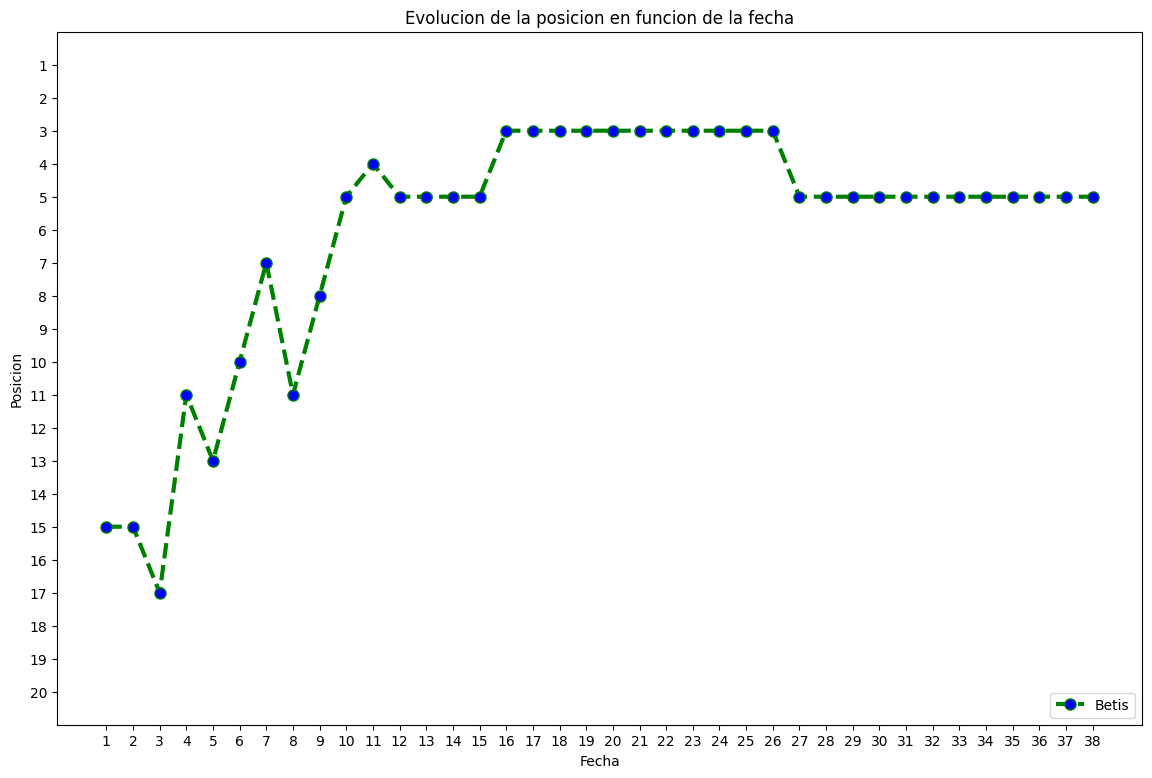

In [24]:
fig, ax = plt.subplots(figsize=(14,9))

ax.plot(fechas[:fecha], posiciones, color='green', linestyle='dashed', linewidth=3, marker='o', markerfacecolor='blue', markersize=8, label=equipo)
ax.set_title('Evolucion de la posicion en funcion de la fecha')
ax.set_ylabel('Posicion')
ax.set_xlabel('Fecha')
plt.legend()
plt.ylim(0,21)
plt.xticks(range(1,fecha+1,1))
plt.yticks(range(1,21,1))
ax.invert_yaxis()
plt.legend([equipo], loc='lower right')
plt.show()